AND

In [1]:
import numpy as np

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.6, 0.6, 0.7
    y = x1 * w1 + x2 * w2
    
    if y <= theta:
        return 0
    else:
        return 1

In [3]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


AND (Bias)

In [4]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5,0.5])
    b = -0.7
    y = np.sum(w*x) + b
    
    if y <= 0:
        return 0
    else : 
        return 1

In [5]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


NAND

In [6]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    y = np.sum(w*x) + b
    
    if y <= 0:
        return 0
    else : 
        return 1

In [7]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


OR

In [8]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    y = np.sum(x*w) +b
    if y <= 0 :
        return 0
    else :
        return 1

In [9]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


XOR

In [10]:
def XOR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.6, 0.6])
    y = np.sum(x * w)
    b = 0.6
    
    if y == b:
        return 1
    else :
        return 0

In [11]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [12]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


sigmoid

In [13]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

In [14]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

ReLU

In [15]:
def ReLU(x):
#     mask = (x <= 0)
#     out = x.copy()
#     out[mask] = 0
#     return out
    return np.maximum(0, x)

In [16]:
x = np.array([2, 1, -1])
ReLU(x)

array([2, 1, 0])

MLP

In [18]:
import numpy as np

def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2x3
    network["b1"] = np.array([0.1, 0.2, 0.3]) # 1x3
    network["W2"] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]]) # 3x2
    network["b2"] = np.array([0.1, 0.2]) # 1x2
    network["W3"] = np.array([[0.1, 0.3],[0.2, 0.4]]) # 2x2
    network["b3"] = np.array([0.1, 0.2]) # 1x2
    return network 


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
#     A1 = (x.dot(W1)) + b1
#     A2 = (A1.dot(W2)) + b2
#     A3 = (A2.dot(W3)) + b3
    
#     return A3
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    
    return a3

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


softmax

In [19]:
X = [[1,2],[3,4]]

In [20]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(np.exp(x), axis=1).reshape(-1,1)
    y = exp_x/sum_exp_x
    return y

In [21]:
softmax(X)

array([[0.26894142, 0.73105858],
       [0.26894142, 0.73105858]])

In [22]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = sum(exp_x)
    y = exp_x/sum_exp_x
    return y

In [23]:
print(softmax([2, 1, -1]))

[0.70538451 0.25949646 0.03511903]


MNIST

In [25]:
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T

    with open('mnist.pkl', 'rb') as f:
        dataset = pickle.load(f)
        
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0 #색을 255의 숫자로 표현
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


In [26]:
import numpy as np
import pickle
# from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

In [27]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [29]:
t_train[:]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

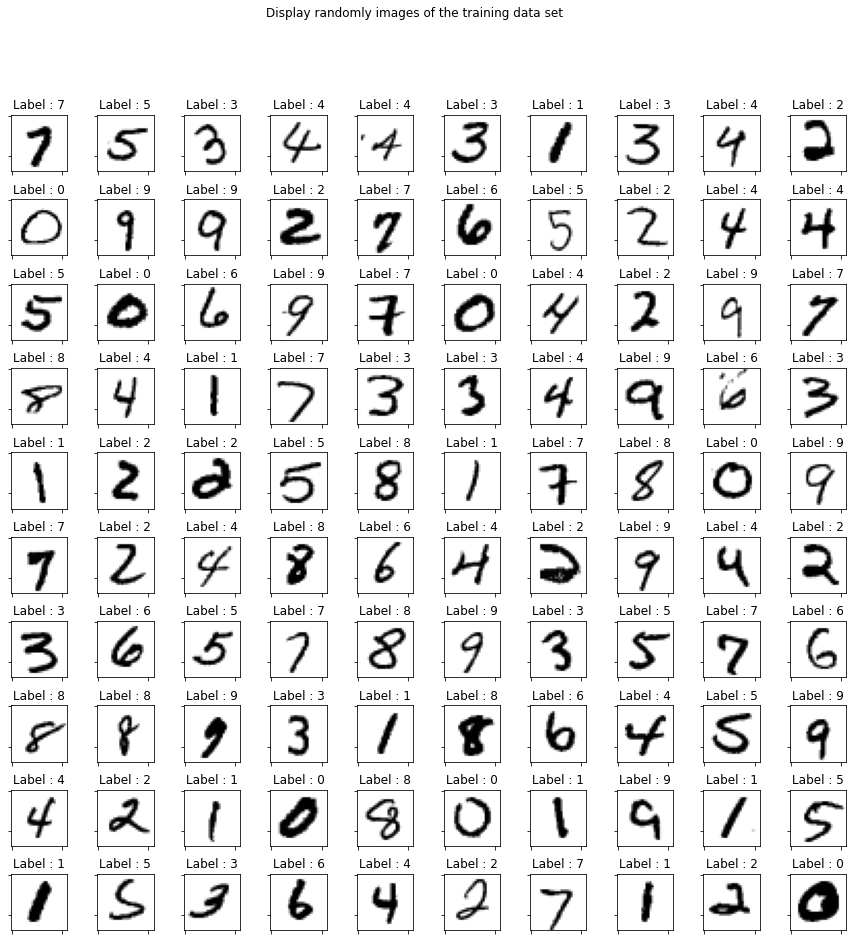

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def displayData(X,Y):
    fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(15, 15))
    fig.suptitle("Display randomly images of the training data set")
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :].reshape(28,28)
            ax[i, j].set_title("Label : {}".format(Y[ind]))
            ax[i, j].imshow(tmp, cmap="gray_r")
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(x_train,t_train)  

In [31]:
with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
x_test.shape

(10000, 784)

In [32]:
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y


# x, t = get_data()

model = init_network()


In [33]:
print("W1", model['W1'].shape)
print('b1', model['b1'].shape)
print('W2', model['W2'].shape)
print('b2', model['b2'].shape)
print('W3', model['W3'].shape)
print('b3', model['b3'].shape)

W1 (784, 50)
b1 (50,)
W2 (50, 100)
b2 (100,)
W3 (100, 10)
b3 (10,)


In [34]:
x_test.shape

(10000, 784)

In [35]:
%%time
accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(model, x_test[i])
    if i == 0:
        print(y)
        print(t_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test))) 

[8.4412619e-05 2.6350660e-06 7.1549485e-04 1.2586275e-03 1.1727965e-06
 4.4990877e-05 1.6269331e-08 9.9706495e-01 9.3744866e-06 8.1831217e-04]
7
Accuracy:0.9352
Wall time: 836 ms


Batch

In [37]:
x_batch = x_train[0:batch_size]
x_batch.shape

(100, 784)

In [38]:
%%time
network = init_network()
accuracy_cnt = 0
batch_size = 100
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    t_batch = predict(network, x_batch)
    
    p = np.argmax(t_batch, axis=1)
    accuracy_cnt += np.sum(p == t_test[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9207
Wall time: 66 ms


In [39]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [40]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [41]:
import numpy as np
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [42]:
s = 0
for i in range(len(X)):
    temp_s = softmax(X[i])
    print(temp_s)
                     
    s += temp_s
s

[0.26894142 0.73105858]
[0.26894142 0.73105858]


array([0.53788284, 1.46211716])

In [43]:
softmax(X)

array([[0.11920292, 0.11920292],
       [0.88079708, 0.88079708]])

In [44]:
np.exp(X)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

In [45]:
sum(np.exp(X))

array([22.80381875, 61.98720613])

In [46]:
sum(np.exp(X)).shape

(2,)

In [47]:
np.sum(np.exp(X), axis=1).reshape(-1, 1).shape

(2, 1)

In [48]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(np.exp(x), axis=1).reshape(-1, 1)
    y = exp_x/sum_exp_x
    return y

In [49]:
softmax(X)

array([[0.11920292, 0.11920292],
       [0.88079708, 0.88079708]])

In [50]:
t = np.array([[1, 2], [3, 4], [5, 6]])
s = np.sum(t)
s

21

In [51]:
t/s

array([[0.04761905, 0.0952381 ],
       [0.14285714, 0.19047619],
       [0.23809524, 0.28571429]])

학습 (Learning)
- 오차 제곱합

In [139]:
import numpy as np
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [142]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [143]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [144]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

- 교차 엔트로피

In [169]:
def cross_entropy(Y, P):
    Y = np.array(Y)
    P = np.array(P)
    
    return -np.sum(Y*np.log(P)+ (1-Y)*np.log(1-P)).round(1)

In [170]:
P = [[0.6, 0.2, 0.9, 0.3], [0.7, 0.9, 0.2, 0.4]]
Y = [[1., 1., 0., 0.], [1., 1., 0., 0.]]

for p, y in zip(P, Y):
    print(cross_entropy(y, p))

4.8
1.2


In [52]:
import math
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [53]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [54]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546